In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
df = pd.read_csv('F:\\mahmoud ali\\oasis project\\Task5\\apps.csv')

In [34]:
print(df.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [36]:
print(df.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [37]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [38]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [39]:
df.dropna(inplace=True)

In [40]:
category_counts = df['Category'].value_counts()

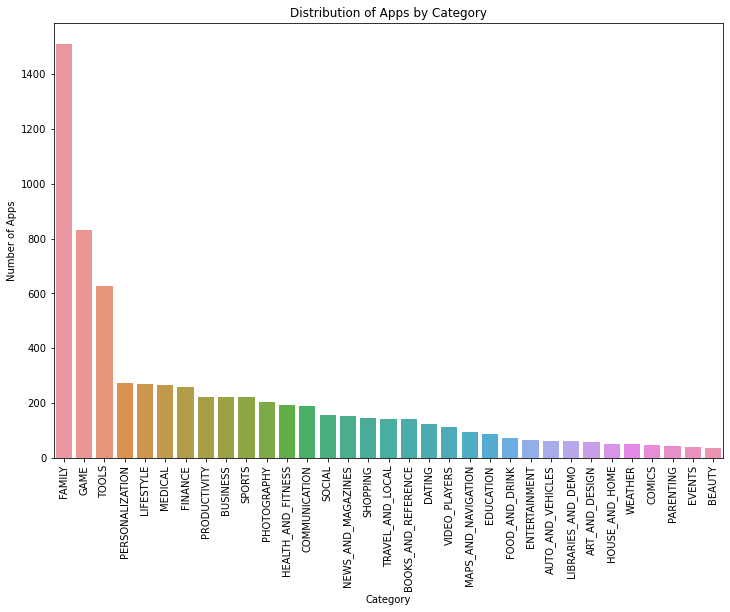

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Apps by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

In [42]:
print(df[['Rating', 'Size', 'Installs', 'Price']].describe())

            Rating         Size
count  7021.000000  7021.000000
mean      4.160704    21.767597
std       0.559241    22.731237
min       1.000000     0.000000
25%       4.000000     4.900000
50%       4.300000    13.000000
75%       4.500000    31.000000
max       5.000000   100.000000


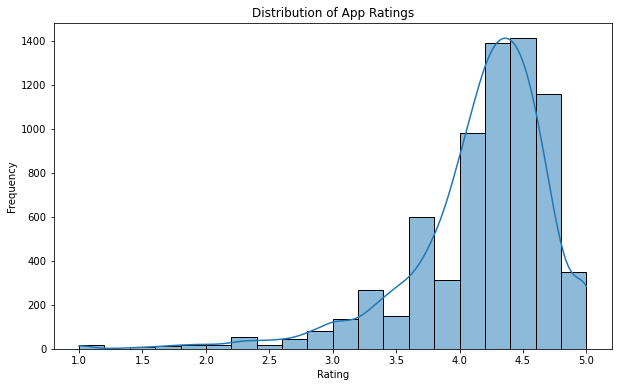

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

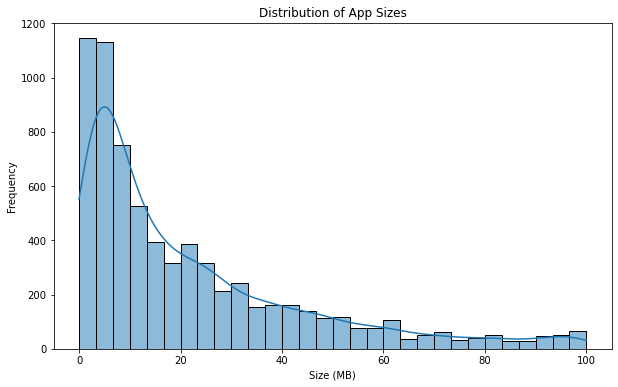

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'], bins=30, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

In [45]:
sid = SentimentIntensityAnalyzer()

In [46]:
df['sentiment'] = df['Reviews'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

In [47]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


In [48]:
sentiment_counts = df['sentiment_label'].value_counts()

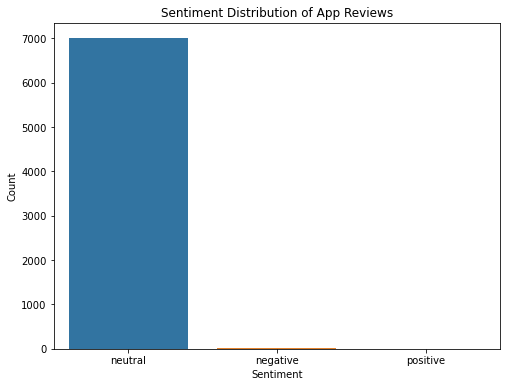

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [50]:
!pip install plotly

In [51]:
import plotly.express as px

In [52]:
fig = px.pie(df, names='Category', title='App Distribution by Category')
fig.show()

Recommendtions
Focus on Popular Categories: Investing in app development within popular categories can increase chances of success.
Enhance App Ratings: Work on improving apps with lower ratings to enhance user experience.
Address Negative Feedback: Prioritize addressing negative feedback to resolve technical issues or enhance features.